In [1]:
%run jupyterutils.py

from linear_regression.LinearRegression import LinearRegression

### Linear Regression .ipynb file
We attempt to try and mimic linear regression and than test it , to test our implementations correctness we would generate the data set using a perfect linear equation , we will than compare how good our algorithm does when it get's data fitting a curve whose mathematically model is known. Run time and correctness might be good KPI for monitoring .



##### Create data

We'll check how good is the algorithm in finding the actual parameters when we feed it absolutely ideal data

In [2]:
x = sp.Symbol('x')
y = 0.8 * x + 0.6
print("y = ", end='')
sp.pprint(y)


y = 0.8⋅x + 0.6


In [3]:
def ModelEquation(input):
    return 0.8*input+0.6

In [4]:
total_data_points = 50000
x = np.linspace(0, 2, total_data_points)
y = ModelEquation(x)

perm = np.random.permutation(len(x))
x = x[perm]
y = y[perm]


##### Split data

We're going to split the data into training and testing data based on a tuneable parameter

In [5]:
training_percent = 0.85
training_numbers = int(training_percent*total_data_points)

training_features = ensure_column_vector(np.array(x[:training_numbers]))
training_labels = np.array(y[:training_numbers])

testing_attributes=ensure_column_vector(np.array(x[training_numbers:]))
testing_labels=np.array(y[training_numbers:])

##### Model Training

(42500, 1) (42500,)
(7500, 1) (7500,)
Iteration  0  weights  [[0.61806796]]  bias  0.00015639243483707232 loss 0.6225376081996846


Iteration  1000  weights  [[0.75338557]]  bias  0.1282774797192711 loss 0.26958349164617
Iteration  2000  weights  [[0.8387467]]  bias  0.21365878692121812 loss 0.12143684430944736
Iteration  3000  weights  [[0.89186746]]  bias  0.2713254466045162 loss 0.05896820342892755
Iteration  4000  weights  [[0.92420228]]  bias  0.31099597977630206 loss 0.032358699719720364
Iteration  5000  weights  [[0.94315644]]  bias  0.33895724180064285 loss 0.020773514573525807
Iteration  6000  weights  [[0.95351683]]  bias  0.3592768850273514 loss 0.015498334161486393
Iteration  7000  weights  [[0.95837717]]  bias  0.37458741708805315 loss 0.012887435104850149
Iteration  8000  weights  [[0.95973634]]  bias  0.3865932253559514 loss 0.011414746395128204
Iteration  9000  weights  [[0.95888528]]  bias  0.39639845346263103 loss 0.010440672445062853
Iteration  10000  weights  [[0.95665714]]  bias  0.4047190291834279 loss 0.009696404336887208
Iteration  11000  weights  [[0.95358915]]  bias  0.4120197770961173 los

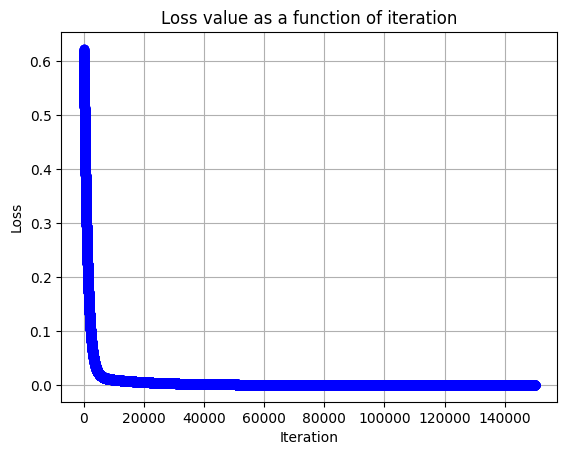

In [7]:
print(training_features.shape , training_labels.T.shape)
print(testing_attributes.shape , testing_labels.T.shape)
model = LinearRegression(training_features, training_labels.T , learning_rate=0.0001)
model.train(150000,True)

values = model.trainingLoss
x = np.arange(1, len(values) + 1)

# Plotting
plt.plot(x, values, marker='o', linestyle='-', color='blue')

# Labels and title
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss value as a function of iteration")
plt.grid(True)
plt.show()



#### Prediction Details

In [8]:
print("Predicted weights ", model.weight, " bias ", model.bias)
print("Prediction loss", model.calculateMseLoss(ModelEquation(testing_attributes),model.predict(testing_attributes)))

Predicted weights  [[0.80221633]]  bias  0.597384597045166
Prediction loss 1.773289185672249e-06
